# Developed by: Mohammad Tariq

# 1. Read in and get an overview of the data

In [1]:
import pandas as pd

data = pd.read_csv('road-accidents.csv', comment='#', sep='|')

rows_and_cols = data.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))
print()
print("Dataset information:")
print()
print(data.info())

data.head(10)

There are 51 rows and 5 columns.


Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


# 2. Create a textual and a graphical summary of the data

Data Description
       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


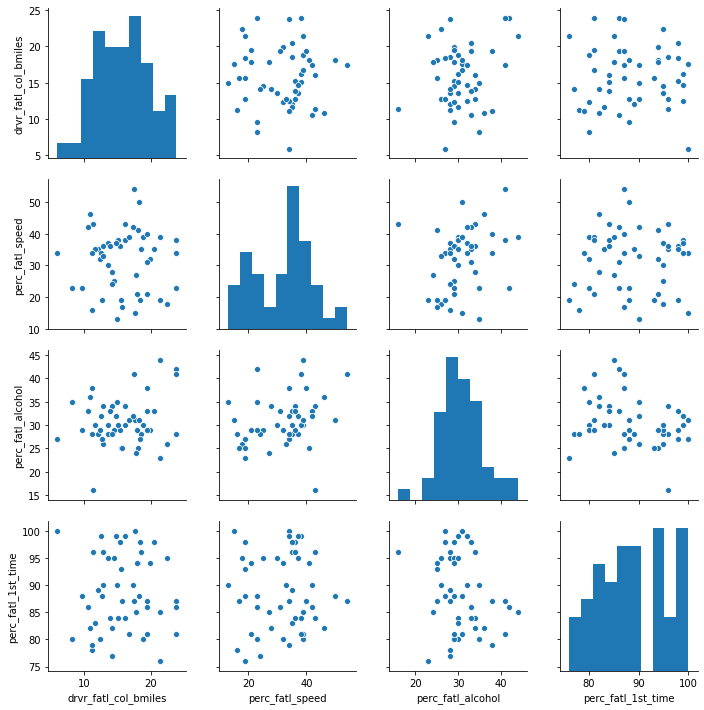

In [2]:
import seaborn as sns
%matplotlib inline

print("Data Description")
print(data.describe())

# Create a pairwise scatter plot to explore the data
sns.pairplot(data)

# 3. Quantify the association of features and accidents

In [3]:
data.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


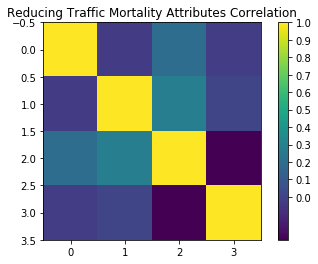

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(data.corr() )
plt.title('Reducing Traffic Mortality Attributes Correlation')
fig.colorbar(cax, ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.show()

# 4. Fit a multivariate linear regression

In [5]:
from sklearn import linear_model

X = data.drop(['state', 'drvr_fatl_col_bmiles'], axis=1)
Y = data.drvr_fatl_col_bmiles.copy()
model = linear_model.LinearRegression()
model.fit(X, Y)
regression_coef = model.coef_
regression_coef


array([-0.04180041,  0.19086404,  0.02473301])

# 5. Perform PCA on standardized data

    perc_fatl_speed  perc_fatl_alcohol  perc_fatl_1st_time
0                39                 30                  80
1                41                 25                  94
2                35                 28                  96
3                18                 26                  95
4                35                 28                  89
5                37                 28                  95
6                46                 36                  82
7                38                 30                  99
8                34                 27                 100
9                21                 29                  94
10               19                 25                  93
11               54                 41                  87
12               36                 29                  98
13               36                 34                  96
14               25                 29                  95
15               17                 25                  

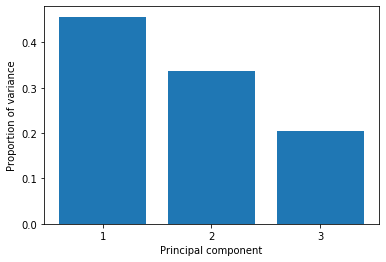

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
pca.fit(X_scaled)

plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance')
plt.xticks([1, 2, 3])
print(X)
print(X_scaled)

# 6. Visualize the first two principal components

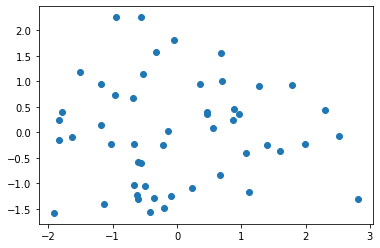

In [7]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

component_1 = components[:,0]
component_2 = components[:,1]

plt.scatter(component_1, component_2)

# 7. Find clusters of similar states in the data

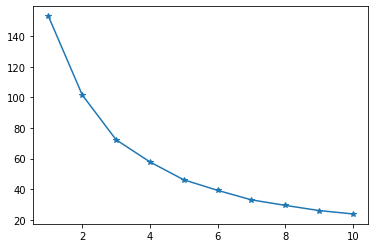

In [8]:
from sklearn.cluster import KMeans
no_of_clusters = range(1, 11)
inert = []
for i in no_of_clusters:
    kmeans = KMeans(n_clusters=i, random_state=8)
    kmeans.fit(X_scaled)
    inert.append(kmeans.inertia_)
plt.plot(no_of_clusters, inert , marker='*')

# 8. KMeans to visualize clusters in the PCA scatter plot

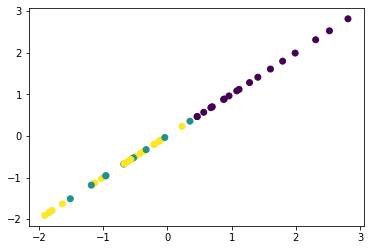

In [9]:
kmeans = KMeans(n_clusters=3, random_state=8)
kmeans.fit(X_scaled)
plt.scatter(component_1,component_1, c=kmeans.labels_)

# 9. Visualize the feature differences between the clusters

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,80,0
1,Alaska,18.1,41,25,94,2
2,Arizona,18.6,35,28,96,2
3,Arkansas,22.4,18,26,95,2
4,California,12.0,35,28,89,2


,cluster,measurement,percent
0,0,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35


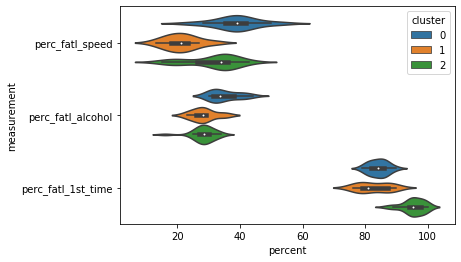

In [10]:
data['cluster'] = kmeans.labels_

display(data.head())

# Reshape the DataFrame to the long format
melt_car = pd.melt(data, id_vars=['cluster'],
                  var_name='measurement', value_name='percent',
                  value_vars=['perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time'])

display(melt_car.head())

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue=melt_car['cluster'])

# 10. Compute the number of accidents within each cluster

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


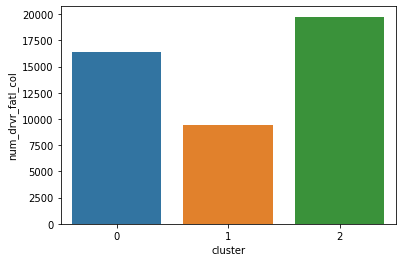

In [11]:
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

display(miles_driven.head())

# Merge the `data` DataFrame with the `miles_driven` DataFrame
new_data = data.merge(miles_driven, on='state')
new_data['num_drvr_fatl_col'] = (new_data['drvr_fatl_col_bmiles'] * new_data['million_miles_annually']) / 1000
display(new_data.head())


sns.barplot(x='cluster', y='num_drvr_fatl_col', data=new_data, estimator=sum, ci=None)


count_mean_sum = new_data.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

# 11. Make a decision when there is no clear right choice

In [12]:
cluster_number = 2
# I will choose cluster 2

In [13]:
kmeans.cluster_centers_

array([[ 0.73352344,  0.85981579, -0.66151049],
       [-1.09584683, -0.45706397, -0.87037451],
       [-0.05223213, -0.47495366,  0.97642311]])

In [14]:
X_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

In [15]:
kmeans.predict([[ 0.76264511, -0.1350496 , -1.26611685]])

array([0])

In [32]:
dd=pd.DataFrame()
dd=X
dd.loc[-1]=[39,30,80]
dd

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,39,30,80
1,41,25,94
2,35,28,96
3,18,26,95
4,35,28,89
5,37,28,95
6,46,36,82
7,38,30,99
8,34,27,100
9,21,29,94


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
aa=scale.fit_transform(dd)
aa[-1]
kmeans.predict([aa[-1]])

array([0])

In [28]:
import pickle
pickle_out = open("clustering_model.pkl","wb")
pickle.dump(kmeans, pickle_out)
pickle_out.close()

In [29]:
print(X)

    perc_fatl_speed  perc_fatl_alcohol  perc_fatl_1st_time
0                39                 30                  80
1                41                 25                  94
2                35                 28                  96
3                18                 26                  95
4                35                 28                  89
5                37                 28                  95
6                46                 36                  82
7                38                 30                  99
8                34                 27                 100
9                21                 29                  94
10               19                 25                  93
11               54                 41                  87
12               36                 29                  98
13               36                 34                  96
14               25                 29                  95
15               17                 25                  